# Watts-Strogatz model

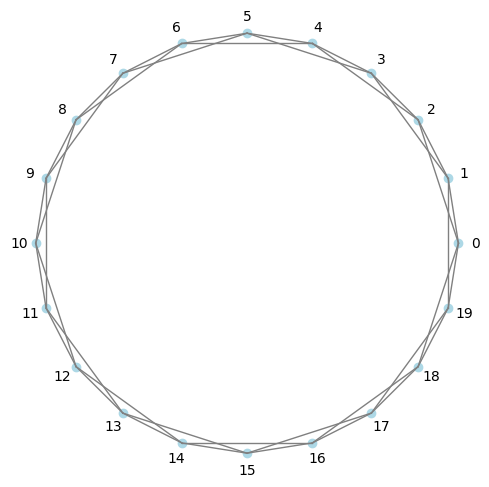

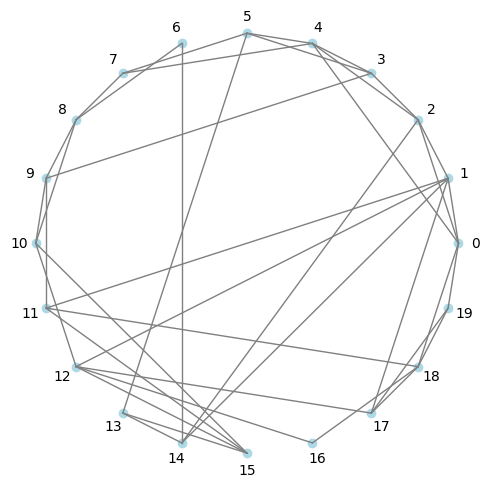

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

def ring_lattice_graph(n: int, k: int) -> set[tuple[int, ...]]:
    assert k % 2 == 0
    edges: set[tuple[int, ...]] = set()
    for i in range(n):
        for j in range(1, k // 2 + 1):
            neighbor = (i + j) % n
            edges.add(tuple(sorted((i, neighbor))))

    return edges

def watts_strogatz_graph(n: int, k: int, p: float) -> set[tuple[int, ...]]:
    edges: set[tuple[int, ...]] = ring_lattice_graph(n, k)
    new_edges: set[tuple[int, ...]] = set()
    for (i, j) in edges:
        if random.random() < p:
            candidates = set(range(n)) - {i} - {x for a, b in new_edges for x in (a, b) if a == i or b == i}
            if candidates:
                new_j = random.choice(list(candidates))
                new_edges.add(tuple(sorted((i, new_j))))
        else:
            new_edges.add((i, j))
    return new_edges

def draw_graph(edges: set[tuple[int, ...]], n: int):
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    positions = np.c_[np.cos(theta), np.sin(theta)]

    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(positions):
        plt.plot(x, y, 'o', color='lightblue')
        plt.text(x * 1.08, y * 1.08, str(i), ha='center', va='center')

    for i, j in edges:
        x1, y1 = positions[i]
        x2, y2 = positions[j]
        plt.plot([x1, x2], [y1, y2], 'gray', lw=1)

    plt.axis('off')
    plt.show()

# Example
ring_lattice_graph_edges = ring_lattice_graph(n=20, k=4)
draw_graph(ring_lattice_graph_edges, n=20)

watts_strogatz_edges = watts_strogatz_graph(n=20, k=4, p=0.3)
draw_graph(watts_strogatz_edges, n=20)
